In [2]:
import tensorflow as tf     # import tensorflow

In [19]:
mnist = tf.keras.datasets.mnist     # load photos of digits data

(x_train, y_train), (x_test, y_test) = mnist.load_data()        # each of the 4 variables are lists of images. x_train[0] gives an image of the first image in the list.

x_train = tf.keras.utils.normalize(x_train, axis=1)     # Normalise the x_train images
x_test = tf.keras.utils.normalize(x_test, axis=1)       # Normalise the x_test images

model = tf.keras.models.Sequential()        # type of tf model than is used where each layer has one input tensor and one output tensor. Here, the input is the image, the output is the prediction.
model.add(tf.keras.layers.Flatten())    #Flatten image to one dimension
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))    # This adds layers to the neural network (think of the image of an nn. A layer is a vertical group of nodes. We're adding 128 nodes here, and using the relu activation function, which is the most commonly used activation function in NNs.)
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))    # Same again, adding another layer of nodes
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # Converts the input vector to vector of categorical probabilities. Here, we give 10 probabilities because there is 10 possible digits (0-9). This is used as the final layer as it provides a probability distribution. 

# Compile the model
model.compile(optimizer='adam',     # Adam is a gradient descent method which will be used to optimise the model.
loss='sparse_categorical_crossentropy',     # Type of loss function which is used when you have two or more label classes
metrics=['accuracy'])       # Records accuracy  

model.fit(x_train, y_train, epochs=3)   # Here, we fit the model to the X_train and y_train data. Epoch = one full cycle of training on the training set. We're using 3 iterations of the training data here as we've defined 3 epochs.

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4663 - accuracy: 0.8722
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1108 - accuracy: 0.9660
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0701 - accuracy: 0.9777


In [20]:
val_loss, val_acc = model.evaluate(x_test, y_test)      # Evaluates the loss and accuracy on the test data
print(val_loss, val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0922 - accuracy: 0.9719
0.09219174087047577 0.9718999862670898


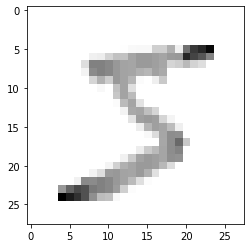

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [30]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)    # Print the image in black and white
plt.show()

print(x_train[0])   # Print the individual values of the image

In [21]:
model.save('number_reader.model')   # Save the model

INFO:tensorflow:Assets written to: number_reader.model/assets


In [22]:
new_model = tf.keras.models.load_model('number_reader.model/')  # Load the model

In [31]:
predictions = new_model.predict([x_test])   # Applies the model to the test set of images

In [24]:
print(predictions)

[[1.35072085e-07 9.55256709e-08 1.23448935e-05 ... 9.99909401e-01
  1.93647963e-07 9.46166097e-07]
 [2.43741056e-07 2.49069388e-04 9.99685407e-01 ... 1.45194443e-08
  1.69887898e-07 4.83238178e-13]
 [3.51198855e-06 9.99683380e-01 2.50893463e-05 ... 1.15486415e-04
  6.07887923e-05 1.84488681e-06]
 ...
 [3.33510073e-08 1.01811074e-05 1.90075539e-07 ... 9.43518025e-05
  2.97949805e-06 1.82790303e-04]
 [4.06046047e-06 3.35624328e-09 3.10398356e-08 ... 2.94764000e-08
  2.62272864e-04 2.67764563e-07]
 [7.20604703e-06 4.01746441e-08 1.74790188e-07 ... 1.53654078e-09
  3.06907964e-07 5.92246074e-09]]


In [28]:
import numpy as np

print(np.argmax(predictions[0]))    # This prints the actual value the model has predicted, based on the image

7


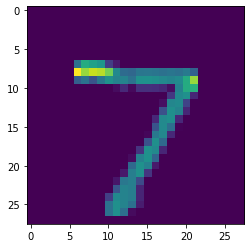

In [29]:
plt.imshow(x_test[0])   # Prints the image to show the model predicted correctly
plt.show()